In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"sydney_rain prediction.csv")

In [3]:
df['RainTomorrow'].unique()

array(['Yes', 'No'], dtype=object)

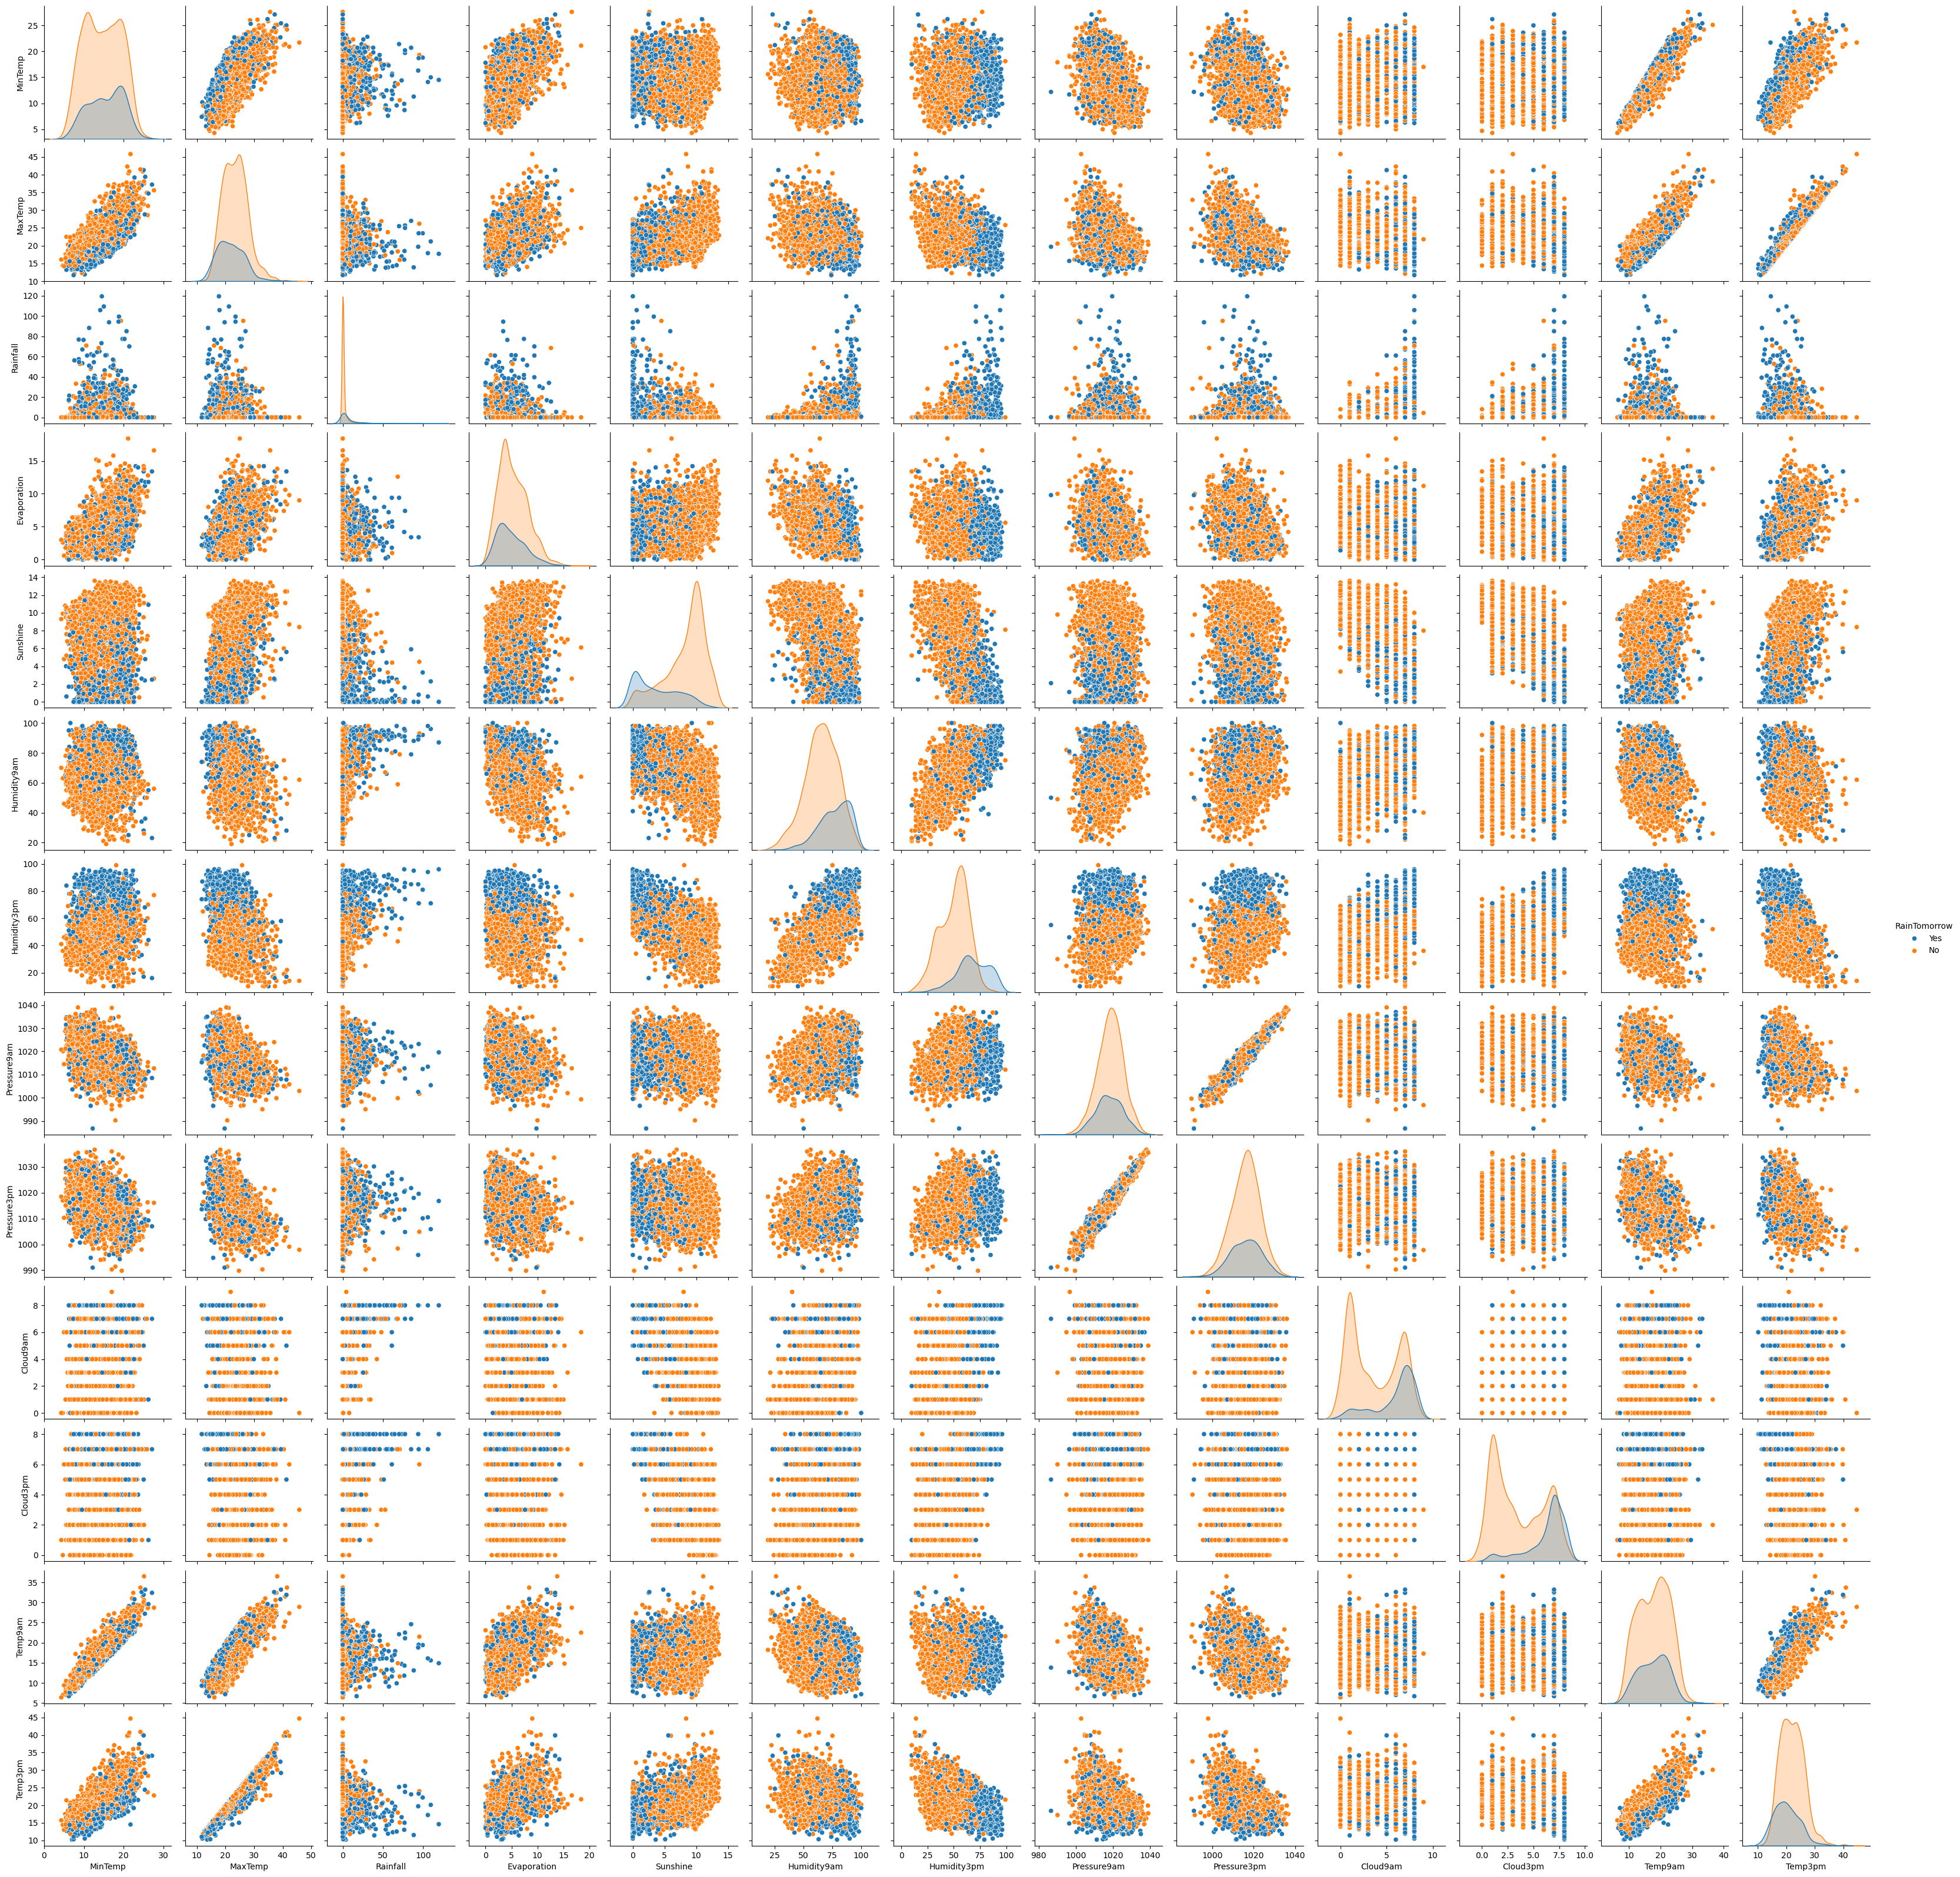

In [4]:
sns.pairplot(data=df,hue="RainTomorrow")
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [6]:

from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the 'Weather' column
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])

print(df)

           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2/1/2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1      2/2/2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2      2/3/2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3      2/4/2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4      2/5/2008   Sydney     19.7     25.7      77.4          NaN       0.0   
...         ...      ...      ...      ...       ...          ...       ...   
3332  6/21/2017   Sydney      8.6     19.6       0.0          2.0       7.8   
3333  6/22/2017   Sydney      9.3     19.2       0.0          2.0       9.2   
3334  6/23/2017   Sydney      9.4     17.7       0.0          2.4       2.7   
3335  6/24/2017   Sydney     10.1     19.3       0.0          1.4       9.3   
3336  6/25/2017   Sydney      7.6     19.3       0.0          3.4       9.4   

      Humidity9am  Humidity3pm  Pressure9am  Pressu

In [7]:
# Fill missing values in each column with the mean of that column
for column in df.columns:
    if df[column].isnull().any():
        # Use mean to fill for numerical columns
        df[column].fillna(df[column].mean(), inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_17776\1630820688.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3337 non-null   float64
 3   MaxTemp       3337 non-null   float64
 4   Rainfall      3337 non-null   float64
 5   Evaporation   3337 non-null   float64
 6   Sunshine      3337 non-null   float64
 7   Humidity9am   3337 non-null   float64
 8   Humidity3pm   3337 non-null   float64
 9   Pressure9am   3337 non-null   float64
 10  Pressure3pm   3337 non-null   float64
 11  Cloud9am      3337 non-null   float64
 12  Cloud3pm      3337 non-null   float64
 13  Temp9am       3337 non-null   float64
 14  Temp3pm       3337 non-null   float64
 15  RainToday     3337 non-null   int32  
 16  RainTomorrow  3337 non-null   int32  
dtypes: float64(13), int32(2), object(2)
memory usage: 417.3+ KB


In [9]:
X = df.iloc[:,:-1]


In [10]:
Y = df["RainTomorrow"]

In [11]:
X.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2/1/2008   Sydney     19.5     22.4      15.6     6.200000       0.0   
1  2/2/2008   Sydney     19.5     25.6       6.0     3.400000       2.7   
2  2/3/2008   Sydney     21.6     24.5       6.6     2.400000       0.1   
3  2/4/2008   Sydney     20.2     22.8      18.8     2.200000       0.0   
4  2/5/2008   Sydney     19.7     25.7      77.4     5.187432       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm  RainToday  
0     20.7     20.9          1  
1     22.4     24.8          1  
2     23.5     23.0          1  
3     21.4     20.9          1  
4     22.5     25.5          1

# I perform EDA and i clearly see that the data is imbalanced hence first we will make a balance data. 
# here i will use undersampling technique

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [13]:
RUS = RandomUnderSampler()

In [14]:
R_X,R_Y = RUS.fit_resample(X,Y)


In [15]:
R_X = R_X.drop(['Date','Location'], axis=1)

In [16]:
R_X

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
619      11.3     22.6       0.0          4.8       4.7         61.0   
2847     20.8     28.8       1.2          3.8      11.6         71.0   
583      10.4     18.2       0.0          3.8      10.0         53.0   
764      20.9     26.7      14.0          3.4       6.2         90.0   
2705     14.2     27.5       0.0          7.2      11.1         62.0   
...       ...      ...       ...          ...       ...          ...   
3321     12.5     18.1      38.8          3.6       0.2         85.0   
3322     12.5     17.2       2.8          1.6       0.2         90.0   
3324      9.5     18.7       0.0          2.2       9.1         82.0   
3328     13.2     19.1       0.0          1.0       0.2         81.0   
3330     11.2     18.3       0.4          2.2       1.9         79.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
619          63.0       1011.8       1006.4       2.0       8.0     17.8   
2847         59.0       1025.4       1022.0       1.0       6.0     24.3   
583          58.0       1018.9       1014.0       3.0       1.0     14.4   
764          77.0       1011.9       1010.8       6.0       3.0     22.4   
2705         47.0       1030.6       1024.7       0.0       1.0     21.5   
...           ...          ...          ...       ...       ...      ...   
3321         70.0       1031.9       1030.2       7.0       7.0     15.8   
3322         85.0       1029.2       1025.9       5.0       6.0     13.1   
3324         62.0       1030.0       1029.1       2.0       3.0     11.2   
3328         67.0       1024.3       1021.8       7.0       7.0     14.6   
3330         69.0       1030.4       1028.4       6.0       7.0     12.7   

      Temp3pm  RainToday  
619      21.1          0  
2847     28.0          1  
583      17.7          0  
764      25.1          1  
2705     27.3          0  
...       ...        ...  
3321     17.5          1  
3322     16.0          1  
3324     18.2          0  
3328     17.4          0  
3330     17.2          0  

[1730 rows x 14 columns]

In [17]:
R_Y

619     0
2847    0
583     0
764     0
2705    0
       ..
3321    1
3322    1
3324    1
3328    1
3330    1
Name: RainTomorrow, Length: 1730, dtype: int32

In [18]:
R_Y.value_counts()

RainTomorrow
0    865
1    865
Name: count, dtype: int64

## here we have successfully balanced the data 

# Train Test Data

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(R_X, R_Y, test_size=0.2, random_state=42)

[[127  59]
 [ 46 114]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       186
           1       0.66      0.71      0.68       160

    accuracy                           0.70       346
   macro avg       0.70      0.70      0.70       346
weighted avg       0.70      0.70      0.70       346

Accuracy (train)  1.0
Accuracy (Test)  0.6965317919075145


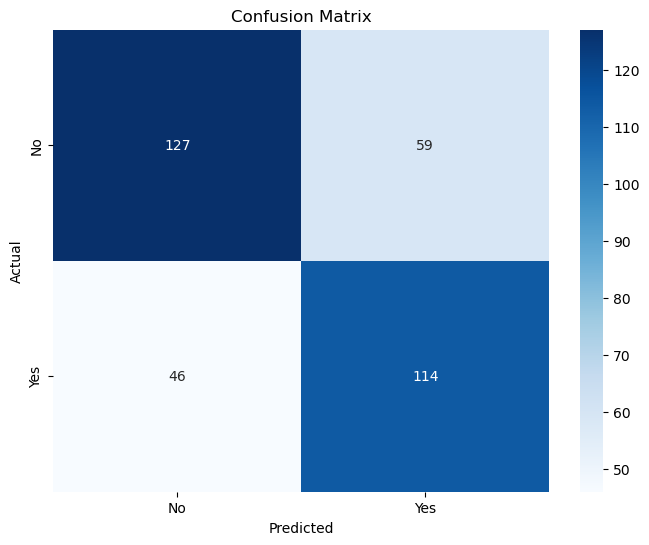

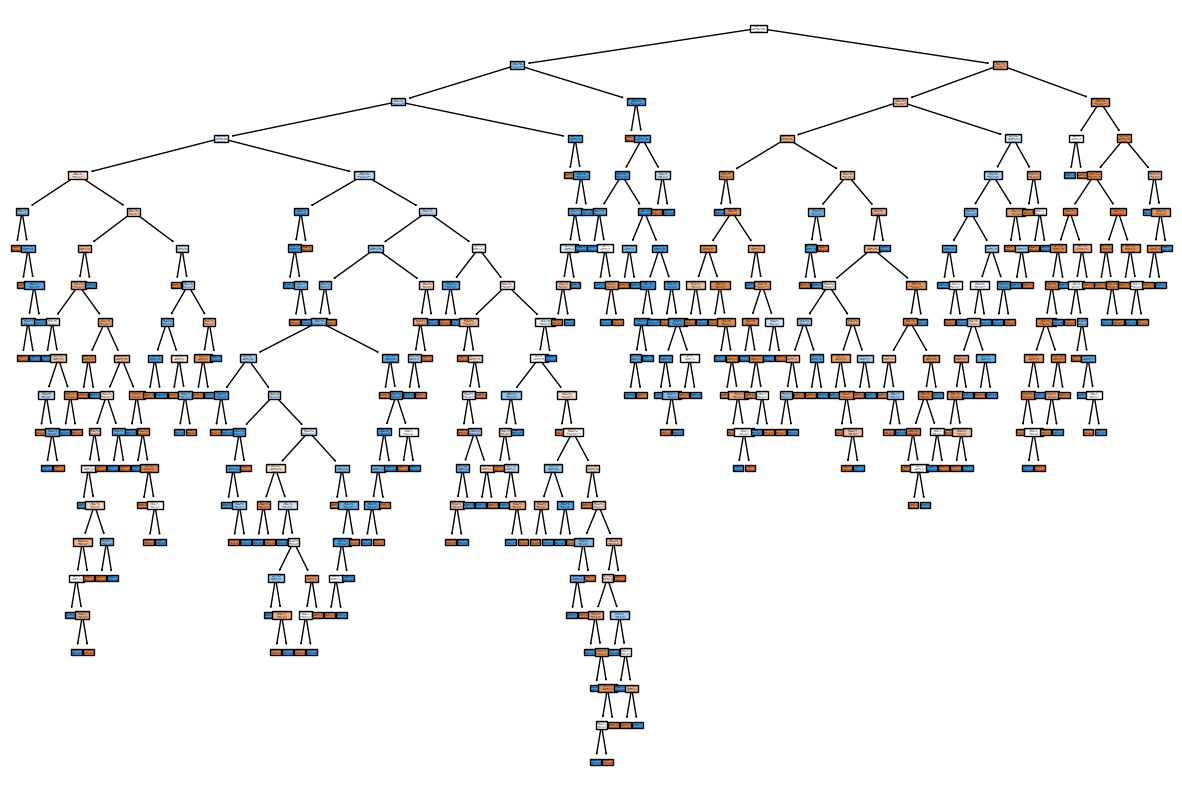

In [25]:
from sklearn import tree
clf = DecisionTreeClassifier( random_state=42)
clf.fit(X_train, y_train)

# Make predictions
clf_y_pred = clf.predict(X_test)
clf_y_pred1 = clf.predict(X_train)

# Calculate the confusion matrix and accuracy score for training and testing sets


CM_clf_test = confusion_matrix(y_test, clf_y_pred)
Acc_clf_test = accuracy_score(y_test, clf_y_pred)

CM_clf_train = confusion_matrix(y_train, clf_y_pred1)
Acc_clf_train = accuracy_score(y_train, clf_y_pred1)

#......................................................................
# Evaluate the model
print(confusion_matrix(y_test, clf_y_pred))
print(classification_report(y_test, clf_y_pred))

print("Accuracy (train) ", Acc_clf_train)
print("Accuracy (Test) ", Acc_clf_test)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, clf_y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()



In [ ]:
#Testing with self data

In [ ]:
clf.predict([[8.8, 18.3, 0.0, 2.4, 7.2, 69.0, 62.0, 1019.1,	1017.8,	4.181523, 4.21866, 10.5, 16.2, 0]])

In [ ]:
clf.predict([[9.5,	18.7,	0.0,	2.2,	9.1,	82.0,	62.0,	1030.0,	1029.1,	2.000000,	3.00000,	11.2,	18.2,	0]])

In [ ]:

# Initialize a Decision Tree Classifier
base_classifier = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier
bagging_clf = BaggingClassifier(base_classifier , n_estimators=50, random_state=42)

# Fit the Bagging Classifier
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred = bagging_clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# import the liberary
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best Random Forest model from the grid search
best_rf_clf = grid_search.best_estimator_

# Make prediction on training and testing sets
best_y_train_pred = best_rf_clf.predict(X_train)
best_y_test_pred = best_rf_clf.predict(X_test)

# Calculate the confusion matrix and accuracy score for training and testing sets
best_cm_rf_train = confusion_matrix(y_train, best_y_train_pred)
best_as_rf_train = accuracy_score(y_train, best_y_train_pred)

best_cm_rf_test = confusion_matrix(y_test, best_y_test_pred)
best_as_rf_test = accuracy_score(y_test, best_y_test_pred)

# Print the evaluation metrics and best parameters
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix (Train):", best_cm_rf_train)
print("Best Accuracy Score (Train):", best_as_rf_train)
print("Confusion Matrix (Test):", best_cm_rf_test)
print("Best Accuracy Score (Test):", best_as_rf_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression classifier with desired parameters
logreg_clf = LogisticRegression(random_state=42, max_iter=50)

# Fit the model to the training data
logreg_clf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = logreg_clf.predict(X_train)
y_test_pred = logreg_clf.predict(X_test)

# Calculate the confusion matrix and accuracy score for training and testing sets
cm_logreg_train = confusion_matrix(y_train, y_train_pred)
as_logreg_train = accuracy_score(y_train, y_train_pred)

cm_logreg_test = confusion_matrix(y_test, y_test_pred)
as_logreg_test = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Confusion Matrix (Train):", cm_logreg_train)
print("Accuracy Score (Train):", as_logreg_train)
print("Confusion Matrix (Test):", cm_logreg_test)
print("Accuracy Score (Test):", as_logreg_test)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()